# Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
``` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

 - Na célula abaixo o arquivo com os dados foi importado. Na sequência a quantidade de linhas e colunas foram atribuídas as variáveis 
**lines** e **columns**.

In [233]:
import pandas as pd
import numpy as np

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
lines, columns = sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


Dados faltantes e cada coluna, por ordem decrescente.

In [234]:
sinasc.isnull().sum().sort_values(ascending=False).head(60)

DTRECORIGA      27028
CODANOMAL       26814
IDADEPAI        19421
SERIESCMAE      12710
DTULTMENST      10072
CODOCUPMAE       2907
MESPRENAT        2867
QTDFILMORT       2098
QTDPARTNOR       1879
QTDPARTCES       1791
QTDFILVIVO       1573
SEMAGESTAC       1238
TPMETESTIM       1238
GESTACAO         1232
QTDGESTANT       1212
STTRABPART        947
CONSPRENAT        930
STCESPARTO        747
RACACORMAE        661
RACACOR           647
IDANOMAL          591
ESTCIVMAE         317
ESCMAE            312
CODUFNATU         298
NATURALMAE        298
CODMUNNATU        298
TPAPRESENT        265
ESCMAE2010        249
ESCMAEAGR1        249
CODESTAB          115
APGAR5            103
APGAR1             96
GRAVIDEZ           79
TPFUNCRESP         67
TPNASCASSI         61
DTDECLARAC         52
PARTO              49
DTNASCMAE          40
HORANASC           21
TPDOCRESP          14
SEXO                4
munResLat           1
munResLon           1
munResAlt           1
munResArea          1
DIFDATA   

Logo abaixo foram selecionadas apenas as colunas relevantes para a análise.

- Cada coluna apresenta o percentual de dados faltantes.


In [235]:
sinasc = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
                    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]

In [236]:
sinasc.isnull().sum().sort_values(ascending=False) / lines * 100

QTDFILVIVO    5.819890
GESTACAO      4.558236
ESTCIVMAE     1.172858
ESCMAE        1.154358
APGAR5        0.381086
GRAVIDEZ      0.292289
LOCNASC       0.000000
IDADEMAE      0.000000
CONSULTAS     0.000000
dtype: float64

A coluna APGAR5 possui uma quantidade pequena de dados faltantes(NaN), o que não interferiria na nossa análise. Sendo assim excluímos os mesmos.

In [237]:
sinasc.dropna(subset=['APGAR5'], inplace=True)

In [238]:
sinasc.isnull().sum().sort_values(ascending=False) / lines * 100

QTDFILVIVO    5.793991
GESTACAO      4.499038
ESTCIVMAE     1.165458
ESCMAE        1.146959
GRAVIDEZ      0.281190
LOCNASC       0.000000
IDADEMAE      0.000000
CONSULTAS     0.000000
APGAR5        0.000000
dtype: float64

As colunas ```ESTCIVMAE``` e ```CONSULTAS``` possuem o valor *9* como dado IGNORADO e por isso os, substituímos todos os dados faltantes por ```9```

In [239]:
sinasc[sinasc['ESTCIVMAE'].isnull()] = 9
sinasc[sinasc['CONSULTAS'].isnull()] = 9

A coluna ```QTDFILVIVO``` é referente ao número de filhos vivos, o que não causaria nenhum impacto susbtituir os dados faltantes por ```0```.

In [240]:
sinasc[sinasc['QTDFILVIVO'].isnull()] = 0

In [241]:
sinasc.isna().sum().sort_values(ascending=False) / lines * 100

GESTACAO      4.006956
ESCMAE        0.899068
GRAVIDEZ      0.236791
LOCNASC       0.000000
IDADEMAE      0.000000
ESTCIVMAE     0.000000
QTDFILVIVO    0.000000
CONSULTAS     0.000000
APGAR5        0.000000
dtype: float64

Nas colunas ```GESTACAO```, ```ESCMAE``` e ```GRAVIDEZ```, o número 9 representa "IGNORADO", ou seja, o campo foi devidamente preenchido com um dado. Para nossa análise é um dado de pouco peso por conta do valor e quantidade do mesmo.

Apesar dos dados faltantes ter uma pequena proporção, a exclusão dos mesmo também exclui suas respectivas linhas.

Para manter a qualidade, marcamos os dados faltantes (NaN) das três colunas como "9 - IGNORADO".

In [242]:
sinasc[sinasc['GESTACAO'].isnull()] = 9
sinasc[sinasc['ESCMAE'].isnull()] = 9
sinasc[sinasc['GRAVIDEZ'].isnull()] = 9

In [243]:
sinasc.isna().sum().sort_values(ascending=False) / lines * 100

LOCNASC       0.0
IDADEMAE      0.0
ESTCIVMAE     0.0
ESCMAE        0.0
QTDFILVIVO    0.0
GESTACAO      0.0
GRAVIDEZ      0.0
CONSULTAS     0.0
APGAR5        0.0
dtype: float64

8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Categorização da variável ```APGAR5``` variável

In [244]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'CLASSIFICACAO'] = 'asfixia severa'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5), 'CLASSIFICACAO'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7), 'CLASSIFICACAO'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 7) & (sinasc['APGAR5'] <= 10), 'CLASSIFICACAO'] = 'normal'

In [245]:
sinasc['CLASSIFICACAO'] = sinasc['CLASSIFICACAO'].str.upper()

In [246]:
sinasc['CLASSIFICACAO'] = sinasc['CLASSIFICACAO'].str.replace(' ','_')

<AxesSubplot:>

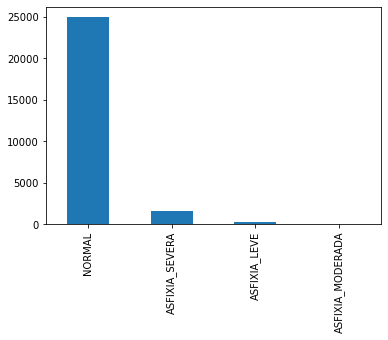

In [247]:
sinasc['CLASSIFICACAO'].value_counts().plot.bar()

In [248]:
lines, columns = sinasc.shape
print(f'Linhas {lines}')
print(f'Colunas {columns}')

Linhas 26925
Colunas 10


In [249]:
sinasc.head(59)

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,CLASSIFICACAO
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,NORMAL
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,NORMAL
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,NORMAL
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,NORMAL
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,NORMAL
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0,NORMAL
6,1,37,1.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,NORMAL
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0,NORMAL
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0,NORMAL
9,1,30,2.0,1 a 3 anos,1.0,37 a 41 semanas,Única,4,10.0,NORMAL
